# Support vector Machines

Support Vector Machines (SVM) is a `supervised machine learning algorithm` which can be used for both classification or regression challenges. 

However,  it is mostly used in classification problems. 

In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well (look at the below snapshot).

Types of SVM kernels:

1. Linear Kernel
2. Polynomial Kernel
3. Radial Basis Function Kernel (RBF)

In [27]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [28]:
# import the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [30]:
# lets make X and y in our data
X = df.drop('species', axis=1)
y = df['species']

In [31]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
# call the model
model = SVC(kernel='rbf')
# train the model
model.fit(X_train, y_train)
# predict the model
y_pred = model.predict(X_test)

In [33]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



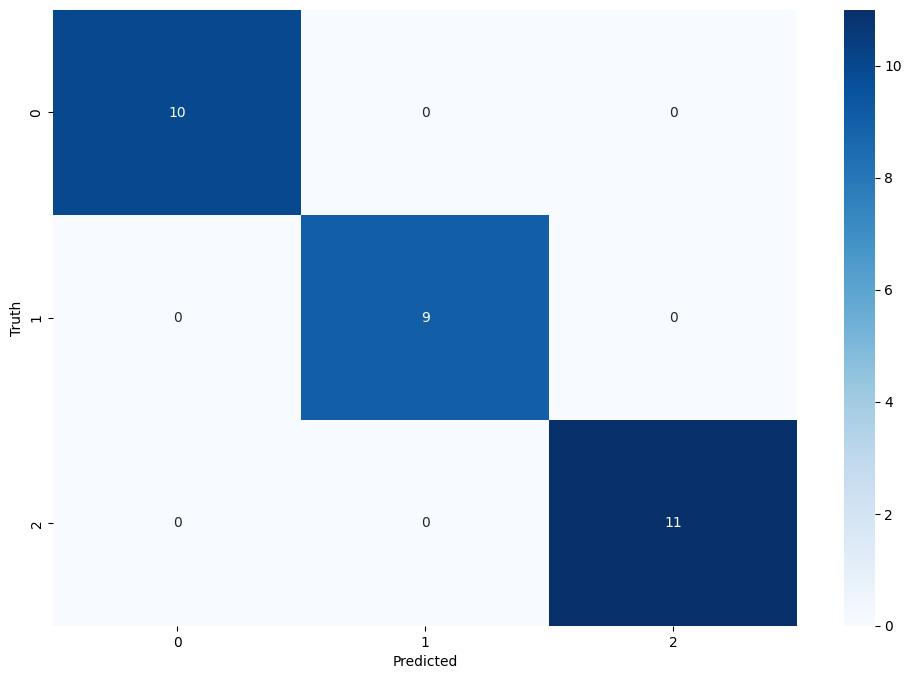

In [34]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [35]:
import warnings
warnings.filterwarnings('ignore')
model.predict([[51, 30000.5, 1.878, 90.2]])[0]

'virginica'

----
# SVR
Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin).

In [36]:
# SVR for diamonds dataset
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [38]:
%%time
import numpy as np
import seaborn as sns
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# load the data
df = sns.load_dataset('diamonds')
df = df.sample(frac=0.2, random_state=42)

# Select features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Convert categorical variables to numerical variables
label_encoders = {}
for col in X.select_dtypes(include='category').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Initialize and train the SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape}')
# RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 13396005.286456719
R2 Score: 0.1692975856528134
Mean Absolute Error: 1995.5978850983934
Mean Absolute Percentage Error: 0.64279249965329
Root Mean Squared Error: 3660.0553665835055
CPU times: total: 3.97 s
Wall time: 4.22 s


---

In [ ]:
svr_model.predict([X_test[0]])[0] # pyright: ignore[reportUndefinedVariable]

2136.997017440259